In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns

EXPLORATORY DATA ANALYSIS


In [3]:
data = pd.read_csv("data.csv", sep = ";")

In [4]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
data.isnull().sum()
data.duplicated().sum()

np.int64(0)

In [6]:
X = data.drop('Target', axis=1)
y = data['Target']


In [7]:
X.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [8]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (object dtype)
categorical_cols = data.select_dtypes(include='object').columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    print(f"Encoded column '{col}'. Mapping: {list(le.classes_)} -> {list(range(len(le.classes_)))}")

# Display the head of the modified data to confirm the changes
print("\nData head after encoding categorical columns:")
display(data.head())

Encoded column 'Target'. Mapping: ['Dropout', 'Enrolled', 'Graduate'] -> [0, 1, 2]

Data head after encoding categorical columns:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [9]:
print(data.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [10]:
corrmatrix = data[['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target']].corr()

c:\Users\marce\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\marce\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


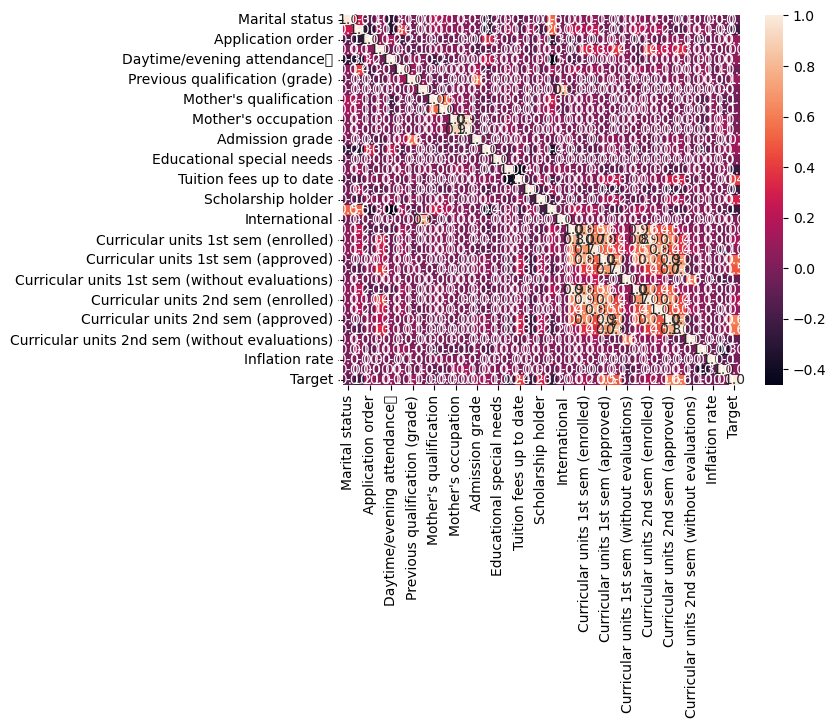

In [11]:
sns.heatmap(corrmatrix, annot=True, fmt=".1f")
plt.show()

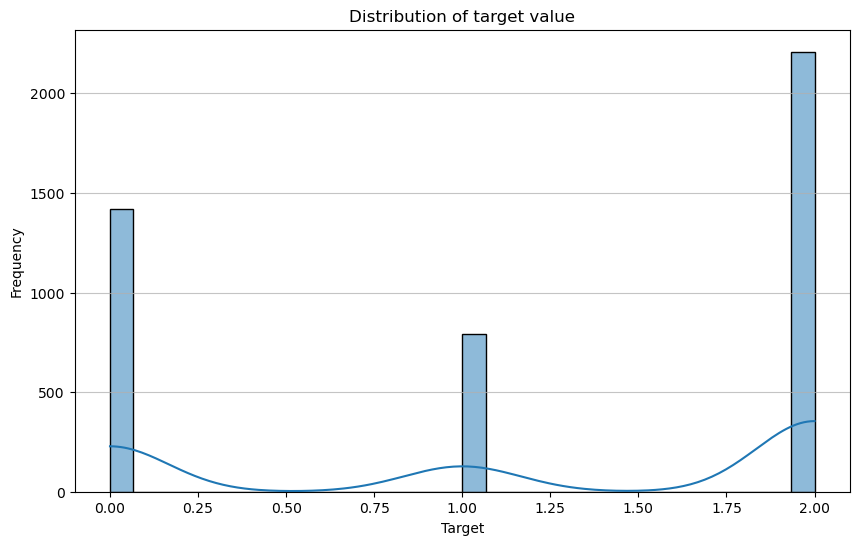

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Target'], kde=True, bins=30)
plt.title('Distribution of target value')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [13]:
data_num = data[['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']]

In [14]:
data_num_scaled = sk.preprocessing.StandardScaler().fit(data_num)

In [15]:
data_num_scaled_array = data_num_scaled.transform(data_num)
data_num_scaled_df = pd.DataFrame(data_num_scaled_array, columns=data_num.columns)
data_num_scaled_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.199273,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.199273,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.199273,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199


c:\Users\marce\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\marce\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


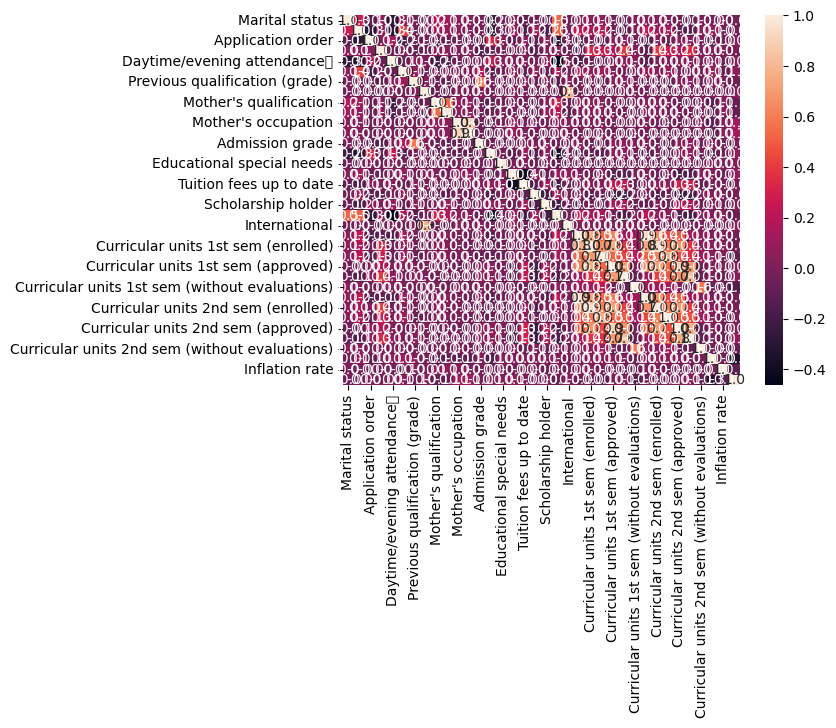

In [16]:
corrmatrix2 = data_num_scaled_df.corr()
sns.heatmap(corrmatrix2, annot=True, fmt=".1f")
plt.show()

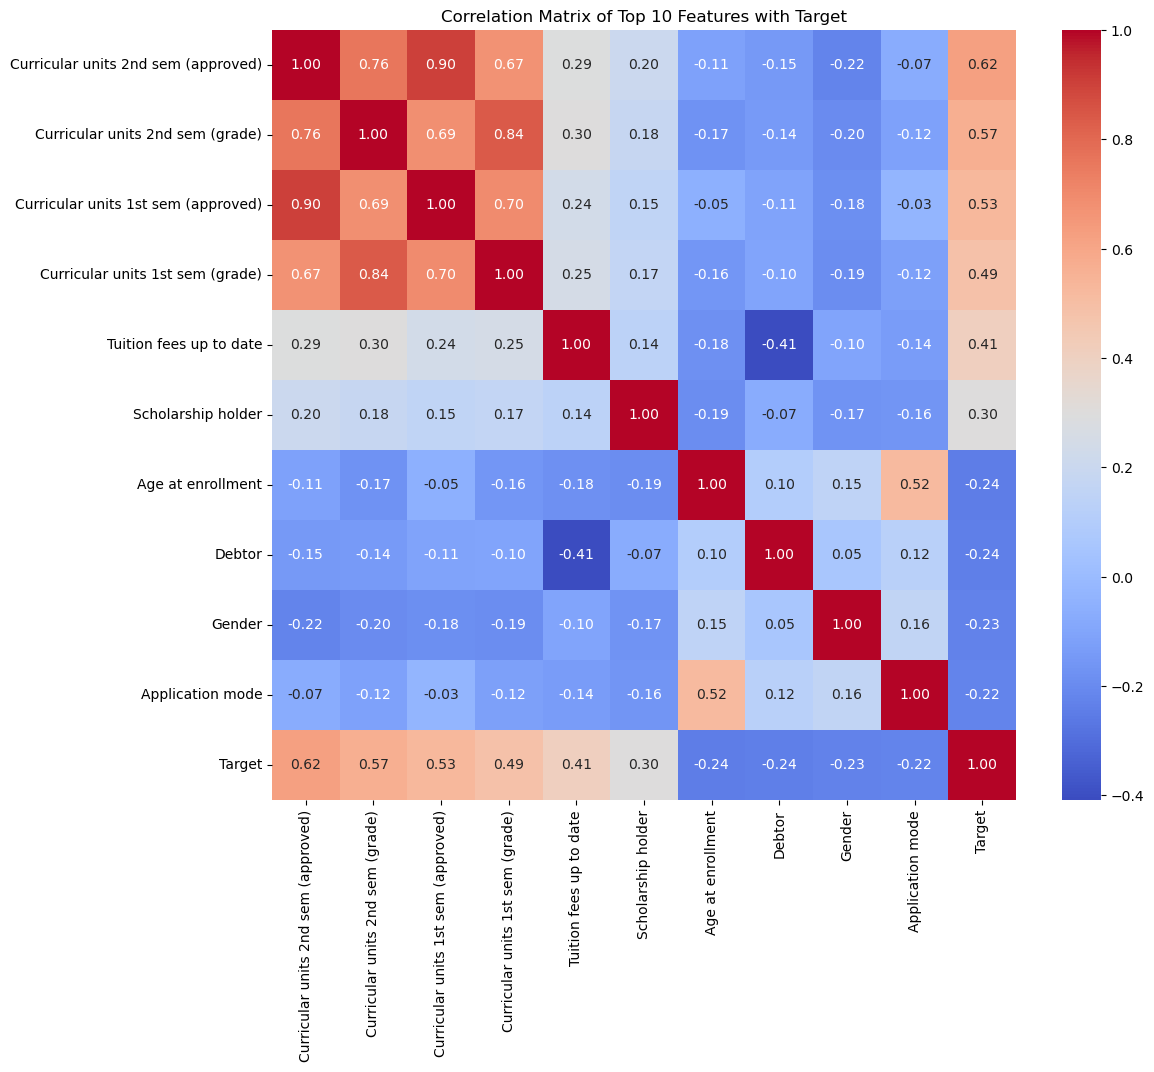

['Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Tuition fees up to date',
 'Scholarship holder',
 'Age at enrollment',
 'Debtor',
 'Gender',
 'Application mode',
 'Target']

In [17]:
# Get correlations with 'Target' and sort by absolute value
target_correlations = corrmatrix['Target'].drop('Target')
top_correlated_features = target_correlations.abs().sort_values(ascending=False).head(10).index.tolist()

# Include 'Target' itself in the list of features for the heatmap
features_for_heatmap = top_correlated_features + ['Target']

# Create a sub-matrix with only the top correlated features and 'Target'
subset_corrmatrix = corrmatrix.loc[features_for_heatmap, features_for_heatmap]

# Plot the heatmap for the subset of correlated features
plt.figure(figsize=(12, 10))
sns.heatmap(subset_corrmatrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Top 10 Features with Target')
plt.show()
features_for_heatmap

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target (y) using the top_correlated_features
X_dt = data[top_correlated_features]
y_dt = data['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6603915662650602

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.71      0.69       441
           1       0.36      0.34      0.35       245
           2       0.76      0.75      0.75       642

    accuracy                           0.66      1328
   macro avg       0.60      0.60      0.60      1328
weighted avg       0.66      0.66      0.66      1328



In [25]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(f"Original target distribution: {Counter(y_dt)}")

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = rus.fit_resample(X_dt, y_dt)

print(f"Resampled target distribution: {Counter(y_resampled)}")

# Now, you can use X_resampled and y_resampled for training your model
# For example, to retrain the Decision Tree:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
# decision_tree_model_resampled = DecisionTreeClassifier(random_state=42)
# decision_tree_model_resampled.fit(X_train_res, y_train_res)
# y_pred_res = decision_tree_model_resampled.predict(X_test_res)
# print("Accuracy (resampled):"), accuracy_score(y_test_res, y_pred_res))
# print("Classification Report (resampled):\n", classification_report(y_test_res, y_pred_res))

Original target distribution: Counter({2: 2209, 0: 1421})
Resampled target distribution: Counter({0: 1421, 2: 1421})


In [26]:
# Drop records where 'Target' value is 1
data_filtered = data[data['Target'] != 1]

# Update X_dt and y_dt to reflect the filtered data, using the top_correlated_features
X_dt = data_filtered[top_correlated_features]
y_dt = data_filtered['Target']

print(f"Original data shape: {data.shape}")
print(f"Filtered data shape: {data_filtered.shape}")
print(f"New target distribution after dropping '1': {Counter(y_dt)}")

display(data_filtered.head())

Original data shape: (4424, 37)
Filtered data shape: (3630, 37)
New target distribution after dropping '1': Counter({2: 2209, 0: 1421})


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


RANDOM FOREST CLASSIFIER

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Split resampled data into training and testing sets
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:

"""
parameters = {'max_depth': [7, 10],
    'n_estimators': [40, 50],
    'max_features': [8, 9, 10],
    'min_samples_leaf': [4, 5]}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_res, y_train_res)
print('Best hyperparameters are '+str(grid_search.best_params_))
print('Best score is: ' + str(grid_search.best_score_))
"""

_IncompleteInputError: incomplete input (632237227.py, line 1)

Best hyperparameters are {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 50}
Best score is: 0.887813332042407

parameters = {'max_depth': [5, 7, 10],
    'n_estimators': [40, 50, 60, 70],
    'max_features': [7, 8, 9, 10],
    'min_samples_leaf': [3, 4, 5]}
    
Best hyperparameters are {'max_depth': 10, 'max_features': 9, 'min_samples_leaf': 4, 'n_estimators': 50}
Best score is: 0.8886943893111294

In [22]:
#print('Best hyperparameters are '+str(grid_search.best_params_))
#print('Best score is: ' + str(grid_search.best_score_))

In [29]:
# Initialize and train the Decision Tree Classifier with resampled data
decision_tree_model_resampled = RandomForestClassifier(random_state=42, max_depth=12, max_features=2, min_samples_leaf=4, n_estimators=71)
decision_tree_model_resampled.fit(X_train_res, y_train_res)

# Make predictions on the test set from resampled data
y_pred_res = decision_tree_model_resampled.predict(X_test_res)

# Evaluate the model with resampled data
print(("Accuracy (resampled data):"), accuracy_score(y_test_res, y_pred_res))
print("\nClassification Report (resampled data):\n", classification_report(y_test_res, y_pred_res))

Accuracy (resampled data): 0.8892794376098418

Classification Report (resampled data):
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       287
           2       0.86      0.92      0.89       282

    accuracy                           0.89       569
   macro avg       0.89      0.89      0.89       569
weighted avg       0.89      0.89      0.89       569



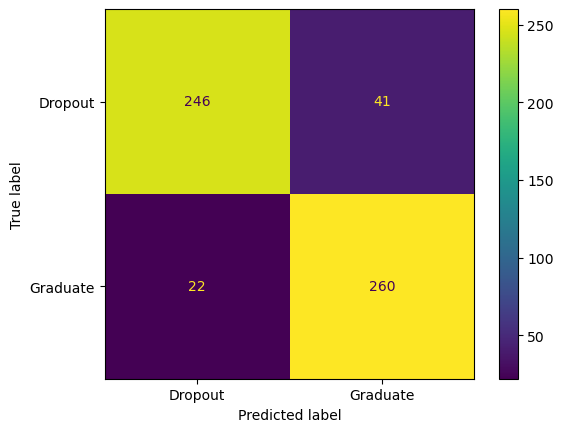

In [30]:
cm = confusion_matrix(np.asarray(y_test_res), np.asarray(y_pred_res))
labels = ["Dropout", "Graduate"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

LOGISTIC REGRESSION

In [31]:
import pandas as pd

# Reset indices of both X_train_res and y_train_res to ensure proper concatenation
X_train_res_reset = X_train_res.reset_index(drop=True)
y_train_res_reset = y_train_res.reset_index(drop=True)

# Concatenate X_train_res and y_train_res
train_data_combined = pd.concat([X_train_res_reset, y_train_res_reset], axis=1)

print("Combined Training Data Head:")
display(train_data_combined.head())

Combined Training Data Head:


,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Tuition fees up to date,Scholarship holder,Age at enrollment,Debtor,Gender,Application mode,Target
0,0,0.000000,0,0.000,0,0,27,0,1,39,0
1,6,12.333333,5,11.800,1,1,23,0,0,44,2
2,5,14.500000,6,14.125,1,0,19,0,0,18,2
3,6,13.500000,6,14.000,1,0,18,0,0,1,0
4,10,11.800000,10,12.400,1,0,21,0,1,43,2


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve

clf = [
    LogisticRegression(solver='newton-cg',penalty=None,max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty=None,max_iter=1000),
    LogisticRegression(solver='sag',penalty=None,max_iter=1000),
    LogisticRegression(solver='saga',penalty=None,max_iter=1000)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
    # Train model on resampled training data
    alg.fit(X_train_res, y_train_res)

    # Make predictions on resampled test data
    predicted = alg.predict(X_test_res)

    # Evaluate using resampled test data and specify pos_label=2 for binary classification
    # Assuming class 2 ('Graduate') is the positive class for AUC, Precision, and Recall
    fp, tp, th = roc_curve(y_test_res, predicted, pos_label=2)

    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_res, y_train_res), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test_res, y_test_res), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_test_res, predicted, pos_label=2),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test_res, predicted, pos_label=2),5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1

clf_compare.sort_values(by = ['Test Accuracy'], ascending = True, inplace = True)
clf_compare

c:\Users\marce\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\marce\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,Train Accuracy,Test Accuracy,Precission,Recall,AUC
3,0.87593,0.87346,0.84314,0.91489,0.87382
0,0.87725,0.87698,0.84641,0.91844,0.87734
1,0.87725,0.87698,0.84641,0.91844,0.87734
2,0.87725,0.87698,0.84641,0.91844,0.87734


In [35]:
logistic = LogisticRegression(solver='newton-cg',penalty=None,max_iter=1000)
logistic.fit(X_train_res, y_train_res)

# Make predictions on the test set from resampled data
y_pred_res = logistic.predict(X_test_res)

# Evaluate the model with resampled data
print(("Accuracy (resampled data):"), accuracy_score(y_test_res, y_pred_res))
print("\nClassification Report (resampled data):\n", classification_report(y_test_res, y_pred_res))

Accuracy (resampled data): 0.8769771528998243

Classification Report (resampled data):
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       287
           2       0.85      0.92      0.88       282

    accuracy                           0.88       569
   macro avg       0.88      0.88      0.88       569
weighted avg       0.88      0.88      0.88       569



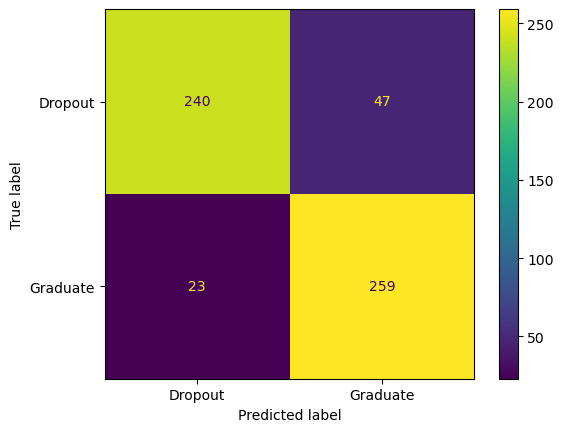

In [36]:
cm = confusion_matrix(np.asarray(y_test_res), np.asarray(y_pred_res))
labels = ["Dropout", "Graduate"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

GRADIENT BOOSTING

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {'learning_rate': [0.065, 0.068, 0.07, 0.072, 0.075],
    'n_estimators': [210, 212, 215, 217, 220],
    'max_features': [2]}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_res, y_train_res)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END learning_rate=0.065, max_features=2, n_estimators=210; total time=   0.3s
[CV] END learning_rate=0.065, max_features=2, n_estimators=210; total time=   0.3s
[CV] END learning_rate=0.065, max_features=2, n_estimators=210; total time=   0.3s
[CV] END learning_rate=0.065, max_features=2, n_estimators=210; total time=   0.3s
[CV] END learning_rate=0.065, max_features=2, n_estimators=210; total time=   0.2s
[CV] END learning_rate=0.065, max_features=2, n_estimators=212; total time=   0.2s
[CV] END learning_rate=0.065, max_features=2, n_estimators=212; total time=   0.3s
[CV] END learning_rate=0.065, max_features=2, n_estimators=212; total time=   0.3s
[CV] END learning_rate=0.065, max_features=2, n_estimators=212; total time=   0.3s
[CV] END learning_rate=0.065, max_features=2, n_estimators=212; total time=   0.2s
[CV] END learning_rate=0.065, max_features=2, n_estimators=215; total time=   0.3s
[CV] END learning_rate=0.

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.065, 0.068, 0.07, 0.072, 0.075],
                         'max_features': [2],
                         'n_estimators': [210, 212, 215, 217, 220]},
             scoring='accuracy', verbose=2)

In [38]:
print('Best hyperparameters are '+str(grid_search.best_params_))
print('Best score is: ' + str(grid_search.best_score_))

Best hyperparameters are {'learning_rate': 0.072, 'max_features': 2, 'n_estimators': 212}
Best score is: 0.8895686692162463


parameters = {'learning_rate': [0.01, 0.05, 0.07, 0.1],
    'n_estimators': [100, 200, 300, 400],
    'max_features': [2, 5, 10, 20]}

    Best hyperparameters are {'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 200}
Best score is: 0.8904516628745703

parameters = {'learning_rate': [0.07, 0.08, 0.09, 0.1],
    'n_estimators': [150, 175, 200, 225, 250],
    'max_features': [2, 3, 4, 5]}
        
    Best hyperparameters are {'learning_rate': 0.07, 'max_features': 2, 'n_estimators': 200}
Best score is: 0.8922079682432106

parameters = {'learning_rate': [0.06, 0.065, 0.07, 0.075],
    'n_estimators': [180, 185, 190, 195, 200, 205, 210, 215],
    'max_features': [2, 3, 4, 5]}

    Best hyperparameters are {'learning_rate': 0.07, 'max_features': 2, 'n_estimators': 215}
Best score is: 0.8904497264849688


In [39]:
gbc = GradientBoostingClassifier(n_estimators=210,
                                 learning_rate=0.07,
                                 random_state=42,
                                 max_features=2)

gbc.fit(X_train_res, y_train_res)

pred_y = gbc.predict(X_test_res)

acc = accuracy_score(y_test_res, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.89


In [40]:
y_pred_res = gbc.predict(X_test_res)

# Evaluate the model with resampled data
print(("Accuracy (resampled data):"), accuracy_score(y_test_res, y_pred_res))
print("\nClassification Report (resampled data):\n", classification_report(y_test_res, y_pred_res))

Accuracy (resampled data): 0.8875219683655536

Classification Report (resampled data):
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       287
           2       0.86      0.92      0.89       282

    accuracy                           0.89       569
   macro avg       0.89      0.89      0.89       569
weighted avg       0.89      0.89      0.89       569



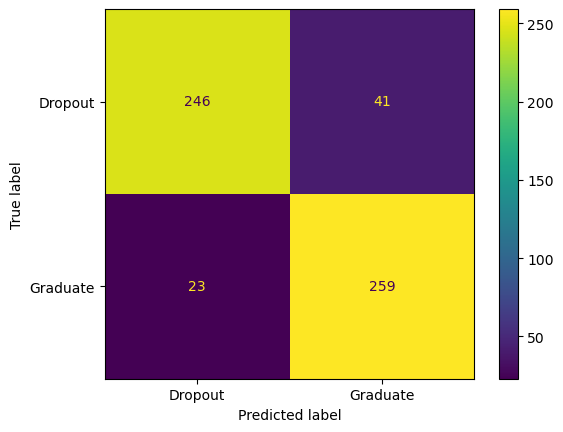

In [41]:
cm = confusion_matrix(np.asarray(y_test_res), np.asarray(y_pred_res))
labels = ["Dropout", "Graduate"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

In [42]:
from joblib import dump
dump(decision_tree_model_resampled, 'random_forest_model.joblib')
dump(logistic, 'logistic_regression_model.joblib')
dump(gbc, 'gradient_boosting_model.joblib')

['gradient_boosting_model.joblib']